## Imports

In [1]:
import inspect
import os  # paths para os scripts
import sys

sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "data"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "features"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "models"))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]), "src", "visualization"))
import context as c  # shotscuts para os paths

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Leitura de Arquivo

In [5]:
data = []

with open(c.DATA_EXTERNAL_FLD/'dataset.txt',"r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

In [6]:
columns = []

with open(c.DATA_EXTERNAL_FLD/'dataset.txt',"r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [8]:
with open(c.DATA_EXTERNAL_FLD/"df.csv","w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [9]:
df = pd.read_csv(c.DATA_EXTERNAL_FLD/"df.csv")
df.cloumns = columns

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_10288\2501347945.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cloumns = columns


In [12]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


## ETL

In [13]:
df.shape

(122410, 97)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

### Criação de Uma variavel Target

In [15]:
df['tr_win'] = df['round_winner'].astype('category').cat.codes

In [19]:
df.head(15)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,tr_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT,0
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0


### Verificação da Variável Map

In [42]:
object_cols = df.select_dtypes(include='object').columns


In [43]:
object_cols

Index(['map', 'round_winner'], dtype='object')

In [44]:
df.map.unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

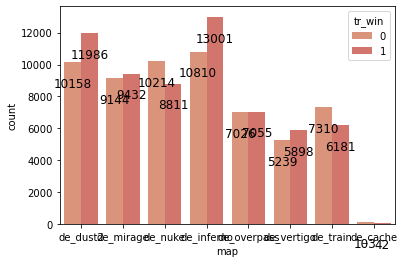

In [45]:
sns.set_palette("flare")
ax =  sns.countplot(x='map', hue='tr_win', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

In [46]:
maps = {'de_dust2':0, 'de_mirage':1, 'de_nuke':2, 'de_inferno':3, 'de_overpass':4,
       'de_vertigo':5, 'de_train':6, 'de_cache':7}

df['map'] = df['map'].map(maps).astype('int64') 

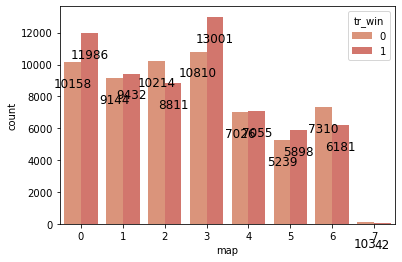

In [49]:
sns.set_palette("flare")
ax =  sns.countplot(x='map', hue='tr_win', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

In [52]:
cor_map = df[["map","tr_win"]].corr()
cor_map


,map,tr_win
map,1.000000,-0.025565
tr_win,-0.025565,1.000000


### Separando as 25 variaveis com maior correlação com a variavel target

In [50]:
# Calculando correlações entre as variáveis e pegando as 25 maiores
correlation = df[columns+["tr_win"]].corr()

print(correlation["tr_win"].apply(abs).sort_values(ascending=False).iloc[:25])
print(correlation["tr_win"].apply(abs).sort_values(ascending=False).iloc[:25].index)

tr_win                          1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [36]:
features = ['ct_armor', 'ct_helmets', 't_helmets', 'ct_defuse_kits',
       't_armor', 'ct_grenade_flashbang', 'ct_players_alive',
       'ct_grenade_smokegrenade', 'ct_weapon_awp', 't_weapon_ak47',
       'ct_health', 'bomb_planted', 'ct_weapon_m4a4', 'ct_grenade_hegrenade',
       'ct_grenade_incendiarygrenade', 'ct_weapon_ak47', 't_grenade_flashbang',
       'ct_weapon_sg553', 't_weapon_sg553', 'ct_weapon_usps', 't_weapon_awp',
       't_players_alive', 't_grenade_smokegrenade', 't_weapon_usps'] 

target = ["tr_win"]  

### HeatMap com as variáveis selecionadas

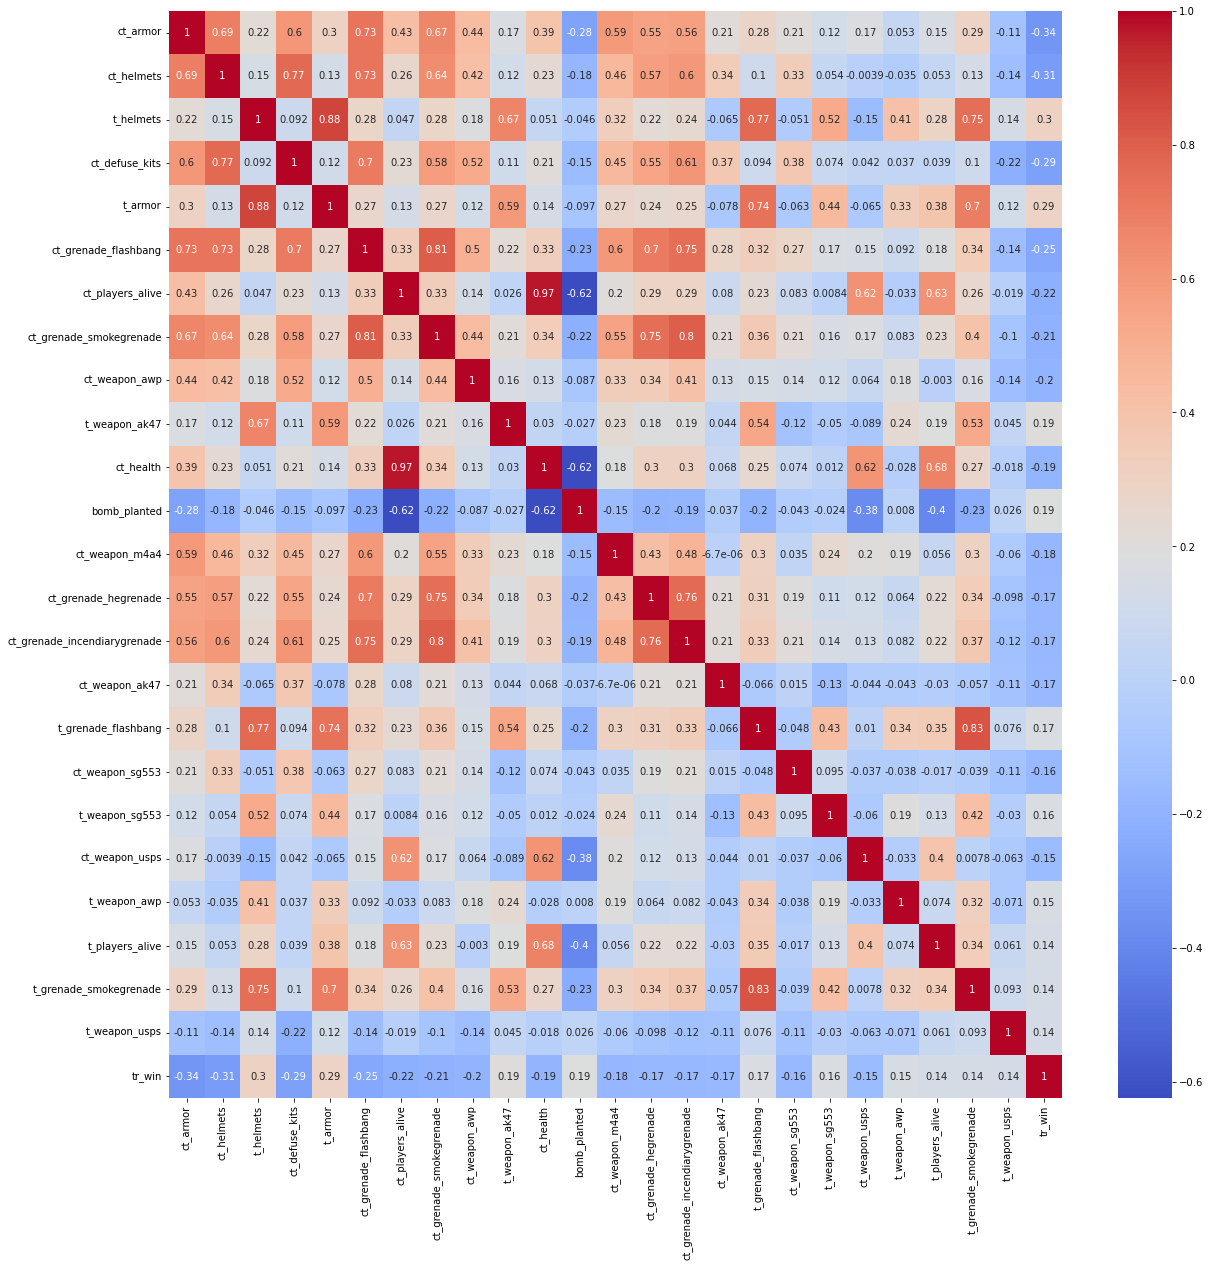

In [39]:
#plot do heatmap com as 25 features mais correlacionadas com o target

corr = df[features + target].corr()
# Create heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax = ax)

# Show plot
plt.show()

### Verificação da distribuição da variável Target


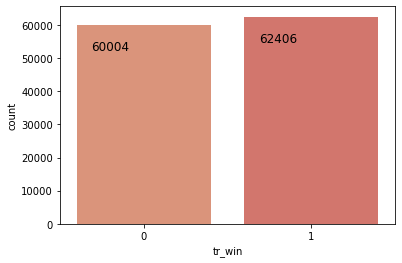

In [53]:
sns.set_palette("flare")
ax = sns.countplot(x='tr_win', data=df)
ax = plt.subplot()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

### Geração Dataset Final

In [40]:
ds = df[features + target]

In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ct_armor                      122410 non-null  float64
 1   ct_helmets                    122410 non-null  float64
 2   t_helmets                     122410 non-null  float64
 3   ct_defuse_kits                122410 non-null  float64
 4   t_armor                       122410 non-null  float64
 5   ct_grenade_flashbang          122410 non-null  float64
 6   ct_players_alive              122410 non-null  float64
 7   ct_grenade_smokegrenade       122410 non-null  float64
 8   ct_weapon_awp                 122410 non-null  float64
 9   t_weapon_ak47                 122410 non-null  float64
 10  ct_health                     122410 non-null  float64
 11  bomb_planted                  122410 non-null  bool   
 12  ct_weapon_m4a4                122410 non-nul

In [54]:
ds.to_csv(c.DATA_PROCESSED_FLD/'datasetFinal.csv', index=False)